In [10]:
import numpy as np
import pandas as pd
import scipy.integrate as integrate
from scipy.stats import norm
import matplotlib.pyplot as plt

In [11]:
def BlackScholesCall(S_0, K, r, sigma, T):
    d1 = (np.log(S_0/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    return S_0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

def BlackScholesPut(S_0, K, r, sigma, T):
    d1 = (np.log(S_0/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    return K*np.exp(-r*T)*norm.cdf(-d2) - S_0*norm.cdf(-d1)

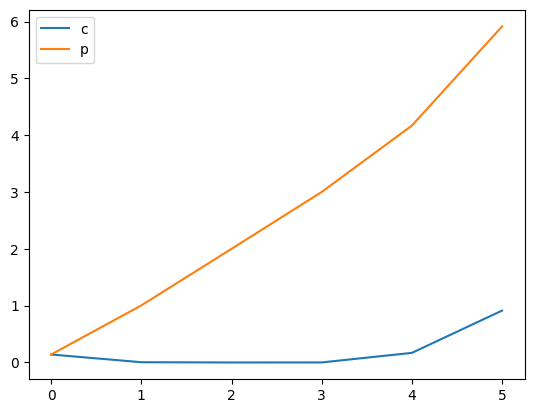

In [15]:
plt.plot([BlackScholesCall(S_0 = 1, K = k, r=0, sigma = cal_ivol(k), T = 4) for k in range(1,7)], label='c')
plt.plot([BlackScholesPut(S_0 = 1, K = k, r=0, sigma = cal_ivol(k), T = 4) for k in range(1,7)], label='p')
plt.legend()
plt.show()

In [16]:
def ivol(K):
    return 0.51 - 0.591*K + 0.376*K**2 - 0.105*K**3 + 0.011*K**4

def cal_ivol(K):
    if K < 3:
        return ivol(K)
    else:
        return ivol(3)

In [17]:
def q1(S0, r, q, T, SD):
    f = S0*np.exp((r-q)*T)
    #ATM implied vol
    vol_for_range = cal_ivol(f)
    #upper limit of the call integral:SD-number of standard deviation away from mean
    maxS = f*np.exp(vol_for_range * SD * np.sqrt(T))

    forward_part = np.sqrt(f) * np.exp(-r*T)
    
    integrated_put = lambda p: p**(-1.5)/4 * BlackScholesPut(S0, p, r, cal_ivol(p), T)
    put_part, error = integrate.quad(integrated_put, 1e-4, f)
    
    integrated_call = lambda c: c**(-1.5)/4 * BlackScholesCall(S0, c, r, cal_ivol(c), T)
    call_part, error = integrate.quad(integrated_call, f, maxS)

    return forward_part - put_part - call_part

In [18]:
def q2(S0, r, q, T, SD):
    f = S0*np.exp((r-q)*T)
    #ATM implied vol
    vol_for_range = cal_ivol(f)
    #upper limit of the call integral:SD-number of standard deviation away from mean
    maxS = f*np.exp(vol_for_range * SD * np.sqrt(T))

    forward_part = f**3 * np.exp(-r*T)
    
    integrated_put = lambda p: 6*BlackScholesPut(S0, p, r, cal_ivol(p), T)*p
    put_part, error = integrate.quad(integrated_put, 1e-4, f)
    
    integrated_call = lambda c: 6*BlackScholesCall(S0, c, r, cal_ivol(c), T)*c
    call_part, error = integrate.quad(integrated_call, f, maxS)

    return forward_part + put_part + call_part

In [19]:
S0, r, q, T = 1, 0, 0, 4

In [22]:
[q1(S0, r, q, T, SD) for SD in range(1,7)]

[0.9744529379057193,
 0.9737922020460309,
 0.9737631318280784,
 0.9737624998879959,
 0.9737624966184146,
 0.9737624965892451]

In [23]:
[q2(S0, r, q, T, SD) for SD in range(1,7)]

[1.4563473950073509,
 1.5157020030493475,
 1.5226686291504619,
 1.5230535930212965,
 1.5230590092868386,
 1.5230590334482457]